In [1]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key
#import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [2]:
#starting URL for Weather Map API Call
url="http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+ weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45c6e92838e610795378c37eb6ed022d


In [3]:
#create an empty list to hold the weather data
city_data=[]
#print beginning of the logging
print("Beginning Data Retrieval     ")
print('-----------------------------')

#create counters
record_count=1
set_count=1

Beginning Data Retrieval     
-----------------------------


In [4]:
#create a set of random latitude and longitide combinations
lats=np.random.uniform(-90,90,size=1500)
lngs=np.random.uniform(-180,180,size=1500)
lat_lngs=zip(lats,lngs)
lat_lngs

In [5]:
#add the latitudes and longitudes to a list
coordinates=list(lat_lngs)

In [6]:
#use print() function to display the latitude and longitude combinations
for coordinate in coordinates:
    print(coordinate[0],coordinate[1])

-4.0723750684600475 -71.4739806320931
2.588237385048302 -166.2594447572675
88.80602559067796 -56.70943143864115
4.26859389814976 157.6025712711002
-51.79015639158714 -19.245785024912323
-57.67763090761787 14.55533285662429
89.81592001364572 89.53640835692346
-3.43404771736256 95.63163388578153
-12.6505314807127 -90.18403670477602
83.4511126808377 -120.00255539412524
8.153724447396769 -66.40011189976504
21.731878832952532 106.34100917116137
42.101903950555936 -171.25154106011098
-11.191612145438668 -42.49989107299032
35.775357196107336 -125.9402993394958
80.62313094416663 149.09052534864338
40.83764354739583 -35.48614132293426
-32.78505598229464 10.103897987059781
75.42910588512717 -18.26098987851111
-71.49258928103691 -63.612511077646985
-33.39956570478927 -151.32045826731883
-18.4467599004783 152.15864878420746
1.4511350402510885 -112.50075416215712
-8.440735597538819 28.116579072941903
7.7341069085168925 -173.54481835959965
-39.10996896574264 41.302650854246224
-70.34656888951264 -76

17.48993723484851 -134.44314477987396
-53.52226669681922 -106.66319459176127
-32.593001555348444 -8.49669985309751
-67.47892205062199 -114.03779476612124
-41.68143679540344 -160.9996973961098
-84.99801611036183 -26.616819673196375
-51.424899102140195 -156.79888913858943
-67.69168581577009 62.56757488900823
-75.05067758680111 163.0523201390497
-61.91818594115955 49.82973100437172
-73.30966632329766 170.09212253973493
-80.6296919028574 115.8526352377844
-25.00867993692526 -165.31917339028772
-19.49476808901065 -65.60526680152657
3.5403488714505187 103.60449885805377
54.10640188473769 -129.22506233878823
-86.36490078674662 -179.99753919478357
78.84633056867222 -141.9704308428903
89.39996938980622 173.73127451310626
-7.408098123810191 -74.42834213883344
-57.31686081097529 -18.575981221490565
47.17701984088032 59.01082316975325
16.42817164682343 167.8460696246156
-64.18083478951137 -57.479958993933195
11.84639434558494 -105.86211616976121
-58.01921742419103 18.896426817584484
89.63289656959

In [7]:
from citipy import citipy

In [8]:
#create a list for holding the cities
cities=[]
#identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city=citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #if the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
#print the city count to confirm sufficient count
len(cities)

632

In [9]:
#loop through all the cities in our list
for i,city in enumerate(cities):
    #group cities in sets of 50 for logging purposes.
    if (i%50==0 and i>50):
        set_count+=1
        record_count=1
        time.sleep(60)
    #create endpoint URL with each city
    city_url=url+"&q="+city.replace(" ","+")
    
    #log the URL,record, and set numbers and the city
    print(f"Processing Record{record_count} of set {set_count}|{city}")
    
    #add 1 to record count
    record_count+=1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record1 of set 1|puerto narino
Processing Record2 of set 1|saleaula
City not found. Skipping...
Processing Record3 of set 1|upernavik
Processing Record4 of set 1|namatanai
Processing Record5 of set 1|arraial do cabo
Processing Record6 of set 1|hermanus
Processing Record7 of set 1|dikson
Processing Record8 of set 1|padang
Processing Record9 of set 1|sechura
Processing Record10 of set 1|tuktoyaktuk
Processing Record11 of set 1|calabozo
Processing Record12 of set 1|lang son
Processing Record13 of set 1|bethel
Processing Record14 of set 1|xique-xique
Processing Record15 of set 1|half moon bay
Processing Record16 of set 1|chokurdakh
Processing Record17 of set 1|ribeira grande
Processing Record18 of set 1|oranjemund
Processing Record19 of set 1|illoqqortoormiut
City not found. Skipping...
Processing Record20 of set 1|ushuaia
Processing Record21 of set 1|mataura
Processing Record22 of set 1|mackay
Processing Record23 of set 1|coahuayana
Processing Record24 of set 1|nchelenge
Proces

Processing Record3 of set 4|kangaatsiaq
Processing Record4 of set 4|roald
Processing Record5 of set 4|yulara
Processing Record6 of set 4|pindiga
Processing Record7 of set 4|nizhneyansk
City not found. Skipping...
Processing Record8 of set 4|artyk
City not found. Skipping...
Processing Record9 of set 4|leningradskiy
Processing Record10 of set 4|grindu
Processing Record11 of set 4|cochrane
Processing Record12 of set 4|viedma
Processing Record13 of set 4|nemuro
Processing Record14 of set 4|kandi
Processing Record15 of set 4|rio grande
Processing Record16 of set 4|georgetown
Processing Record17 of set 4|urengoy
Processing Record18 of set 4|rovaniemi
Processing Record19 of set 4|necochea
Processing Record20 of set 4|rawson
Processing Record21 of set 4|odessa
Processing Record22 of set 4|xichang
Processing Record23 of set 4|cariati
Processing Record24 of set 4|kruisfontein
Processing Record25 of set 4|halifax
Processing Record26 of set 4|vila velha
Processing Record27 of set 4|longlac
City n

Processing Record6 of set 8|tiksi
Processing Record7 of set 8|santo antonio do sudoeste
Processing Record8 of set 8|myitkyina
Processing Record9 of set 8|namibe
Processing Record10 of set 8|abnub
Processing Record11 of set 8|duku
Processing Record12 of set 8|sur
Processing Record13 of set 8|laiyang
Processing Record14 of set 8|paso de los toros
Processing Record15 of set 8|salalah
Processing Record16 of set 8|svetlyy
Processing Record17 of set 8|tongren
Processing Record18 of set 8|westport
Processing Record19 of set 8|laharpur
Processing Record20 of set 8|great falls
Processing Record21 of set 8|bokovskaya
Processing Record22 of set 8|kavaratti
Processing Record23 of set 8|isangel
Processing Record24 of set 8|utiroa
City not found. Skipping...
Processing Record25 of set 8|belmonte
Processing Record26 of set 8|changji
Processing Record27 of set 8|egvekinot
Processing Record28 of set 8|coetupo
City not found. Skipping...
Processing Record29 of set 8|gamboma
Processing Record30 of set 8|

City not found. Skipping...
Processing Record11 of set 12|magistralnyy
Processing Record12 of set 12|makubetsu
Processing Record13 of set 12|autazes
Processing Record14 of set 12|ust-barguzin
Processing Record15 of set 12|high level
Processing Record16 of set 12|taltal
Processing Record17 of set 12|iberia
Processing Record18 of set 12|athens
Processing Record19 of set 12|sabang
Processing Record20 of set 12|vila
Processing Record21 of set 12|bardiyah
Processing Record22 of set 12|zachagansk
City not found. Skipping...
Processing Record23 of set 12|sunndalsora
Processing Record24 of set 12|tarko-sale
Processing Record25 of set 12|uribia
Processing Record26 of set 12|chernyshevskiy
Processing Record27 of set 12|nogales
Processing Record28 of set 12|kuche
City not found. Skipping...
Processing Record29 of set 12|moosomin
Processing Record30 of set 12|trat
Processing Record31 of set 12|soanierana ivongo
Processing Record32 of set 12|vitim
-----------------------------
Data Retrieval Comple

In [12]:
#convert the array of dictionaries to a pandas dataframe
city_data_df=pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Narino,-3.7703,-70.3831,84.49,69,3,1.70,CO,2022-07-07 14:47:30
1,Upernavik,72.7868,-56.1549,38.55,88,77,14.32,GL,2022-07-07 14:47:30
2,Namatanai,-3.6667,152.4333,78.31,82,79,8.30,PG,2022-07-07 14:47:31
3,Arraial Do Cabo,-22.9661,-42.0278,82.36,47,0,10.36,BR,2022-07-07 14:46:06
4,Hermanus,-34.4187,19.2345,59.81,81,89,6.44,ZA,2022-07-07 14:47:24
5,Dikson,73.5069,80.5464,36.61,82,100,6.60,RU,2022-07-07 14:46:16
6,Padang,-0.9492,100.3543,78.67,86,11,3.42,ID,2022-07-07 14:47:32
7,Sechura,-5.5569,-80.8222,68.38,67,0,7.52,PE,2022-07-07 14:47:32
8,Tuktoyaktuk,69.4541,-133.0374,57.20,88,0,11.50,CA,2022-07-07 14:44:35
9,Calabozo,8.9242,-67.4293,83.73,65,30,10.87,VE,2022-07-07 14:47:33


In [15]:
#change the order of columns
new_column_order=["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df.head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Puerto Narino,CO,2022-07-07 14:47:30,-3.7703,-70.3831,84.49,69,3,1.70
1,Upernavik,GL,2022-07-07 14:47:30,72.7868,-56.1549,38.55,88,77,14.32
2,Namatanai,PG,2022-07-07 14:47:31,-3.6667,152.4333,78.31,82,79,8.30
3,Arraial Do Cabo,BR,2022-07-07 14:46:06,-22.9661,-42.0278,82.36,47,0,10.36
4,Hermanus,ZA,2022-07-07 14:47:24,-34.4187,19.2345,59.81,81,89,6.44


In [17]:
#create the output file(CSV)
output_data_file='weather_data/cities.csv'

#export the city_data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
#extract relevant fields from the dataframe for plotting
lats=city_data_df['Lat']
max_temps=city_data_df['Max Temp']
humidity=city_data_df['Humidity']
cloudiness=city_data_df['Cloudiness']
wind_speed=city_data_df['Wind Speed']

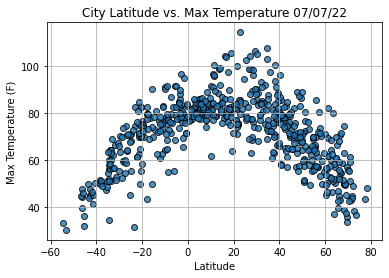

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

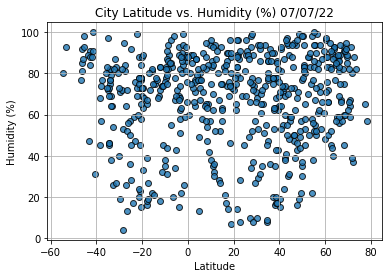

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity (%) "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

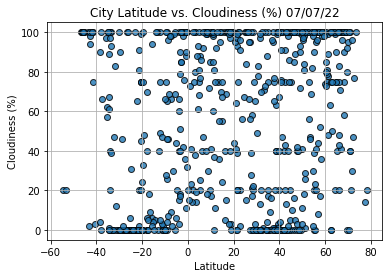

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

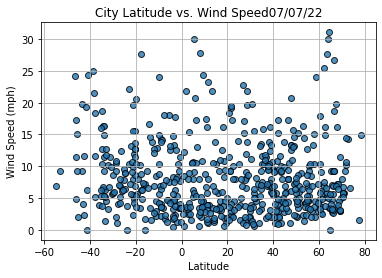

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed"+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [24]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [25]:
index13=city_data_df.loc[13]
index13

City                Half Moon Bay
Country                        US
Date          2022-07-07 14:44:21
Lat                       37.4636
Lng                     -122.4286
Max Temp                    62.89
Humidity                       90
Cloudiness                     75
Wind Speed                  10.36
Name: 13, dtype: object

In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Upernavik,GL,2022-07-07 14:47:30,72.7868,-56.1549,38.55,88,77,14.32
5,Dikson,RU,2022-07-07 14:46:16,73.5069,80.5464,36.61,82,100,6.60
8,Tuktoyaktuk,CA,2022-07-07 14:44:35,69.4541,-133.0374,57.20,88,0,11.50
9,Calabozo,VE,2022-07-07 14:47:33,8.9242,-67.4293,83.73,65,30,10.87
10,Lang Son,VN,2022-07-07 14:47:33,21.8333,106.7333,74.79,96,100,2.17


In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

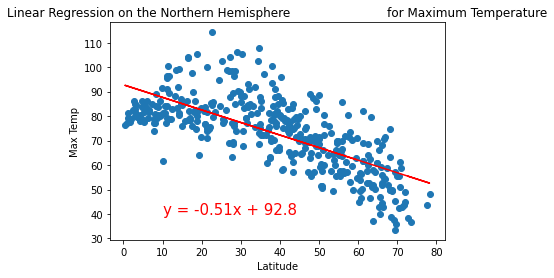

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

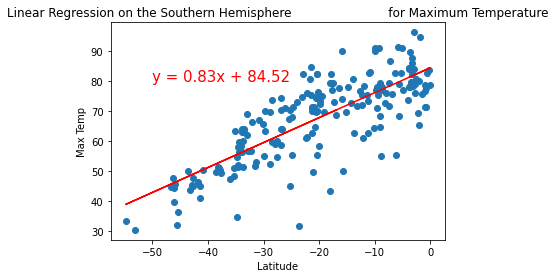

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for Maximum Temperature', 'Max Temp',(-50,80))

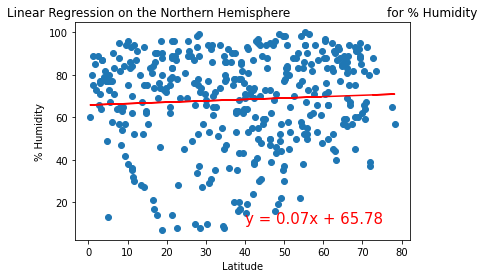

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

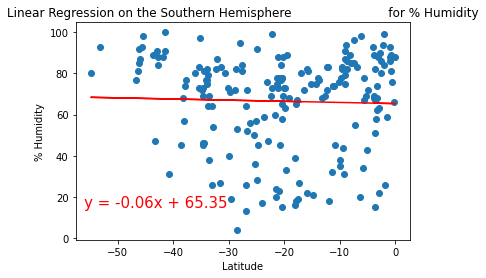

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-56,15))

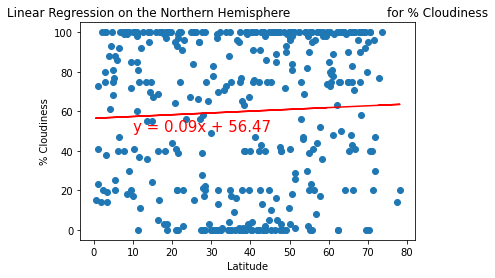

In [40]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,50))

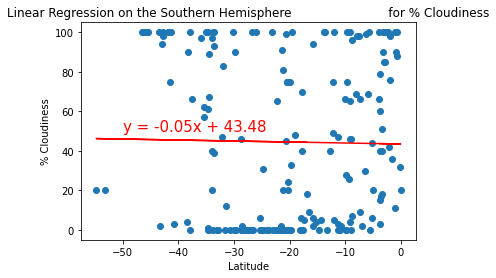

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,50))

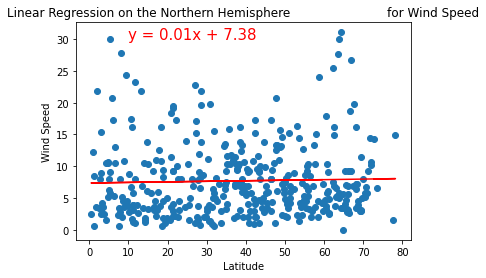

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(10,30))

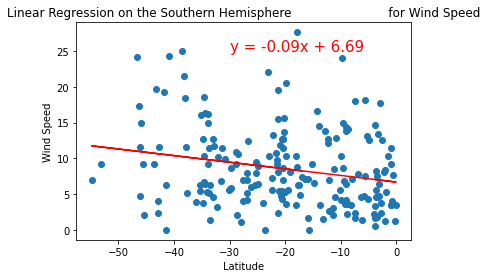

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-30,25))